In [2]:
pip install ultralytics opencv-python matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Users\letra\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# ======== 1. Load model đã train =========
model = YOLO(r"G:\brain-tumor\runs\train\yolo_brain_tumor_from_scratch\weights\best.pt")

# ======== 2. Load ảnh test =========
image_path = r"G:\Hk9\DoAnChuyenNganhTTNT\brain-tumor\datasets\brain-tumor\test\images\val_1 (6).jpg"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# ======== 3. Dự đoán =========
results = model.predict(image_path, conf=0.25)
boxes = results[0].boxes

# ======== 4. Vẽ kết quả =========
if boxes is None or len(boxes) == 0:
    pred_img = image.copy()
    cv2.putText(pred_img, "Khong phat hien khoi u", (30, 40),
                cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 0, 255), 3)
else:
    # tự vẽ bbox + label đúng nhờ model.names
    pred_img = results[0].plot()

pred_img_rgb = cv2.cvtColor(pred_img, cv2.COLOR_BGR2RGB)

# ======== 5. Hiển thị ảnh =========
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Ảnh Gốc")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(pred_img_rgb)
plt.title("Kết quả dự đoán")
plt.axis("off")

plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'G:\\brain-tumor\\runs\\train\\yolo_brain_tumor_from_scratch\\weights\\best.pt'


🧠 Ảnh: G:\Hk9\DoAnChuyenNganhTTNT\brain-tumor\datasets\brain-tumor\test\images\val_1 (26).jpg
 - Lớp: tumor, Độ tin cậy: 0.82, Vị trí: (65, 79, 94, 120)


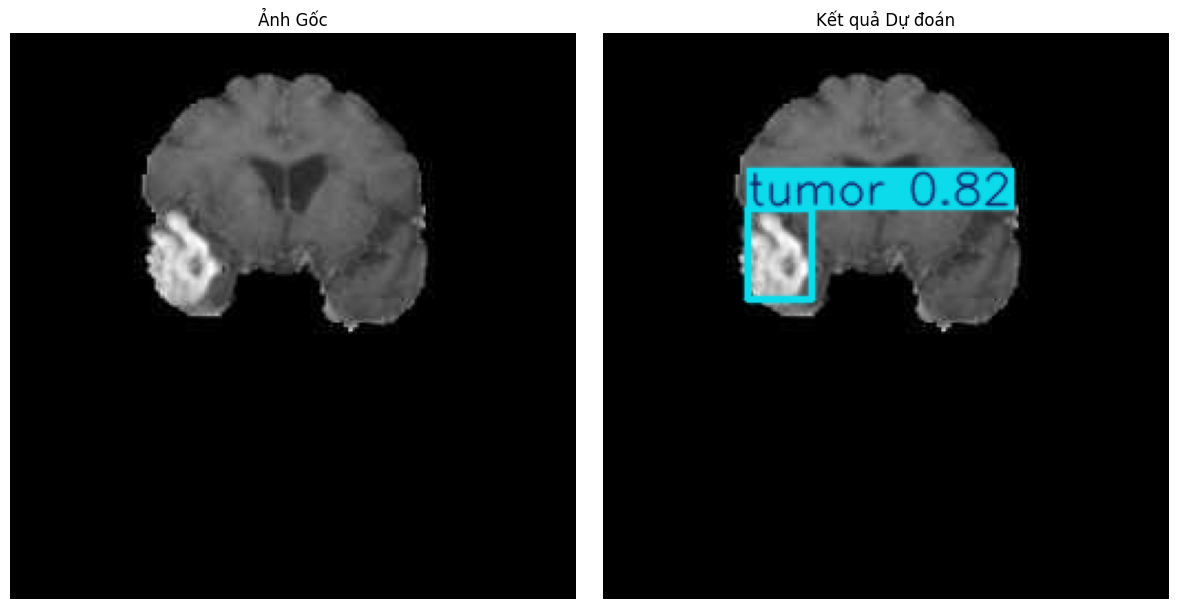

In [4]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# === CẤU HÌNH ===
MODEL_PATH = r"G:\Hk9\DoAnChuyenNganhTTNT\brain-tumor\runs\train\yolo_brain_tumor_continue26\weights\best.pt"
IMAGE_PATH = r"G:\Hk9\DoAnChuyenNganhTTNT\brain-tumor\datasets\brain-tumor\test\images\val_1 (26).jpg"
CONFIDENCE_THRESHOLD = 0.25

# === TẢI MÔ HÌNH ===
model = YOLO(MODEL_PATH)

# === DỰ ĐOÁN ẢNH ===
results = model.predict(
    source=IMAGE_PATH,
    imgsz=512,
    conf=CONFIDENCE_THRESHOLD,
    save=False,
    verbose=False
)

# === ĐỌC ẢNH GỐC ===
image_bgr = cv2.imread(IMAGE_PATH)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# === XỬ LÝ KẾT QUẢ ===
for r in results:
    print(f"\n🧠 Ảnh: {r.path}")
    boxes = r.boxes

    if boxes is None or len(boxes) == 0:
        print(" - Không phát hiện khối u")
        pred_img = image_bgr.copy()
        cv2.putText(pred_img, "Khong phat hien khoi u", (30, 40),
                    cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 0, 255), 3)
    else:
        pred_img = r.plot()  # đã có bbox + label
        for box in boxes:
            cls_id = int(box.cls.cpu().item())
            conf = float(box.conf.cpu().item())
            label = r.names[cls_id]
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            print(f" - Lớp: {label}, Độ tin cậy: {conf:.2f}, Vị trí: ({x1}, {y1}, {x2}, {y2})")

# === HIỂN THỊ ẢNH GỐC & DỰ ĐOÁN ===
pred_img_rgb = cv2.cvtColor(pred_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Ảnh Gốc")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(pred_img_rgb)
plt.title("Kết quả Dự đoán")
plt.axis("off")

plt.tight_layout()
plt.show()
